/var/folders/pw/xkpd454x6_ddjhgkzcvrngc40000gn/T/ipykernel_46530/1433821667.py:12: DtypeWarning: Columns (15,337,353,359,361,363,401,405,437,484,544,560) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv)


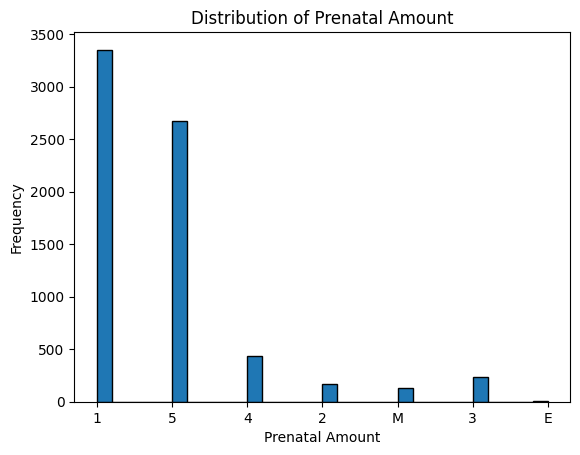

/var/folders/pw/xkpd454x6_ddjhgkzcvrngc40000gn/T/ipykernel_46530/1433821667.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PrenatalCategory'] = df['PRENATALAMOUNT'].map(mapping)


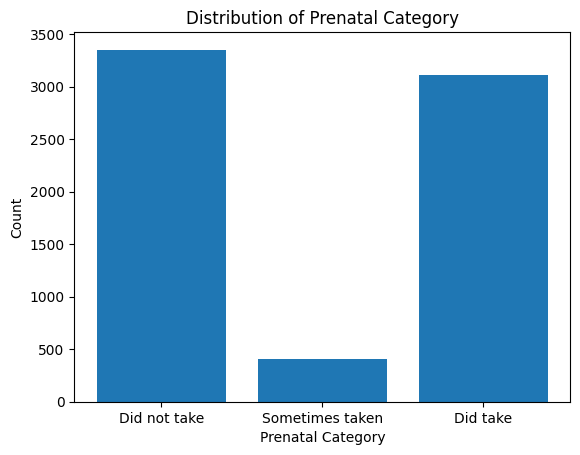

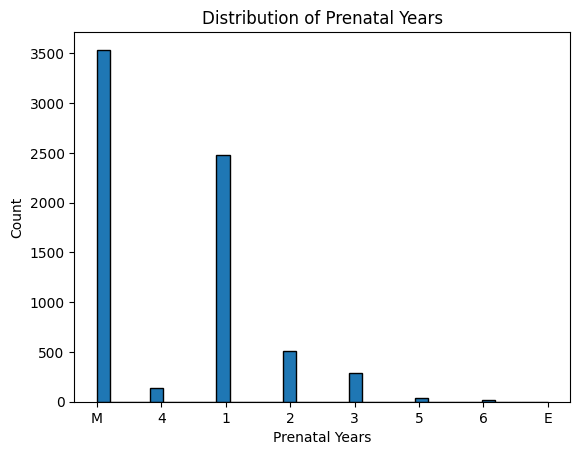

Percentage of people who took prenatal vitamins: 45.30%
Percentage of people in each prenatal category:
Did not take       48.805709
Did take           45.295660
Sometimes taken     5.898631
Name: PrenatalCategory, dtype: float64
Percentage of people in each prenatal category, by year of prenatal vitamin intake:
PRENATALYEARS  PrenatalCategory
1              Did take             85.541195
               Sometimes taken      11.106624
               Did not take          3.352181
2              Did take             89.702970
               Sometimes taken       9.108911
               Did not take          1.188119
3              Did take             91.724138
               Sometimes taken       6.896552
               Did not take          1.379310
4              Did take             86.363636
               Sometimes taken       9.090909
               Did not take          4.545455
5              Did take             77.142857
               Did not take         11.428571
          

/var/folders/pw/xkpd454x6_ddjhgkzcvrngc40000gn/T/ipykernel_46530/1433821667.py:109: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_percentages = grouped_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


In [11]:
import matplotlib.pyplot as plt
from pathlib import Path 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
from sklearn.cluster import KMeans

csv = Path('Food').with_name('FOOD_FREQUENCY_ANALYSIS.CSV') #food data
df = pd.read_csv(csv)

csv1 = Path('Food').with_name('EDITMarkers.csv')  #the data we used for clustering
dfe = pd.read_csv(csv1)

df = pd.merge(df,dfe,on="PublicID")
dcopy = df
#NOTE: NO IODINE MARKER IN DATA
df = df[['PublicID','DT_FOLAC','DT_IRON','DT_CALC','VITD_MCG','TOTAL_CHOLINE','DT_SODI',
         'DT_TOTN3','DT_THIA','DT_RIBO','DT_NIAC','DT_VITB6','DT_VB12','DT_VITC',
         'DT_KCAL','DT_PROT','DT_CARB','DT_TFAT','DT_SFAT','DT_MFAT','DT_PFAT',
         'DT_CHOL','DT_SUG_T','DT_FIBE','DT_CAFFN','DT_ALCO', 
         
         
         
         'AHEI_VEGS','AHEI_FRUITS','AHEI_WGRAINS','AHEI_SUGBEVS',
         'AHEI_NUTLEGS','AHEI_RMEATS','AHEI_TRFATPCT','AHEI_DHAEPA',
         'AHEI_PUFAPCT','AHEI_SODIUM','AHEI_ALCDRKS','AHEI2010','PRENATALAMOUNT','PRENATALYEARS',
         ]]
df.head()


plt.hist(df['PRENATALAMOUNT'], bins=30, edgecolor='black')
plt.title('Distribution of Prenatal Amount')
plt.xlabel('Prenatal Amount')
plt.ylabel('Frequency')
plt.show()


# Create a dictionary for mapping
mapping = {
    '1': 'Did not take',
    '2': 'Sometimes taken',
    '3': 'Sometimes taken',
    '4': 'Did take',
    '5': 'Did take',
}

# Apply the mapping to the 'PRENATALAMOUNT' column and create a new column 'PrenatalCategory'
df['PrenatalCategory'] = df['PRENATALAMOUNT'].map(mapping)

# Count the number of occurrences of each category
counts = df['PrenatalCategory'].value_counts()

# Sort by the desired order
order = ['Did not take', 'Sometimes taken', 'Did take']
counts = counts.loc[order]

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values, align='center')
ax.set_title('Distribution of Prenatal Category')
ax.set_xlabel('Prenatal Category')
ax.set_ylabel('Count')

# Add all categories to the x-axis
ax.set_xticks(order)
ax.set_xticklabels(order)

plt.show()


# Plot a histogram of 'PRENATALYEARS'
plt.hist(df['PRENATALYEARS'].dropna(), bins='auto', edgecolor='black')

plt.title('Distribution of Prenatal Years')
plt.xlabel('Prenatal Years')
plt.ylabel('Count')

plt.show()

counts = df['PrenatalCategory'].value_counts()

# Calculate the percentage who took prenatal vitamins
percentage_took_vitamins = counts['Did take'] / counts.sum() * 100

print(f"Percentage of people who took prenatal vitamins: {percentage_took_vitamins:.2f}%")


# Count the number of occurrences of each category
counts = df['PrenatalCategory'].value_counts()

# Calculate the percentage for each category
percentages = counts / counts.sum() * 100

print("Percentage of people in each prenatal category:")
print(percentages)



# Exclude missing data in 'PRENATALYEARS'
df = df[df['PRENATALYEARS'] != 'M']

# Group by 'PRENATALYEARS' and calculate value counts within each group
grouped_counts = df.groupby('PRENATALYEARS')['PrenatalCategory'].value_counts()

# Calculate percentages within each group
grouped_percentages = grouped_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

print("Percentage of people in each prenatal category, by year of prenatal vitamin intake:")
print(grouped_percentages)